In [2]:
import torchvision
import fastai

In [3]:
from fastai.vision import *
import torch.nn.functional as F
from fastai.layers import *

In [4]:
%matplotlib inline

In [1]:
def get_cifar():
    trainset = torchvision.datasets.CIFAR10('datasets', train=True, download=False)
    testset = torchvision.datasets.CIFAR10('datasets', train=False, download=False)
    data = DataBunch.create(train_ds=trainset, valid_ds=testset)
    for num, (img, label) in enumerate(train_ds):
        name = f"datasets/train/class{label}/{num}.png"
        img.save(name, format='png')

In [41]:
data = ImageDataBunch.from_folder('datasets')

In [43]:
img, label = data.valid_ds[0]
label

Category class0

In [8]:
m = models.Darknet([1, 2, 1], num_classes=10, nf=16)

In [45]:
learn = Learner(data, m, metrics=[accuracy])

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.02E-03


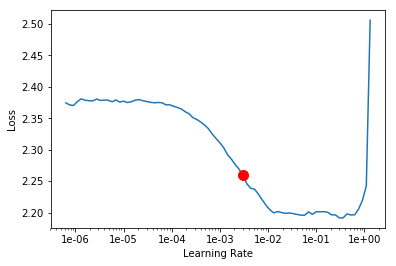

In [33]:
learn.recorder.plot()

In [47]:
epochs = 15
lr = 3e-3
learn.fit_one_cycle(epochs, lr)

epoch,train_loss,valid_loss,accuracy
1,1.383871,1.438802,0.478800
2,1.137976,1.335615,0.530400
3,0.982113,1.731681,0.466700
4,0.853894,0.944785,0.669900
5,0.754758,1.198095,0.599100
6,0.661701,1.037694,0.647100
7,0.598939,0.771620,0.737400
8,0.502563,0.723901,0.750700
9,0.469371,0.689827,0.766500
10,0.379708,0.574217,0.808000


In [48]:
learn.save("darknet_cifar", with_opt=False)

In [6]:
bs=256
sz=32
tfms = get_transforms(max_rotate=0.0, max_warp=0.0)

In [7]:
data = ImageDataBunch.from_folder('datasets', ds_tfms=tfms)

In [9]:
learn = Learner(data, m, metrics=[accuracy])
learn.load("darknet_cifar")

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageItemList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
class0,class0,class0,class0,class0
Path: datasets;

Valid: LabelList (10000 items)
x: ImageItemList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
class0,class0,class0,class0,class0
Path: datasets;

Test: None, model=Darknet(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1, inplace)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1, inplace)


In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-06


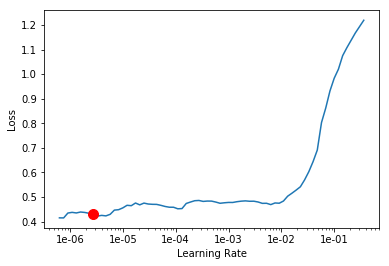

In [11]:
learn.recorder.plot()

In [13]:
epochs = 15
lr = 1e-4
learn.fit_one_cycle(epochs, lr)

epoch,train_loss,valid_loss,accuracy
1,0.483446,0.622760,0.818200
2,0.424149,0.611744,0.818400
3,0.439858,0.591505,0.818800
4,0.433594,0.580091,0.820200
5,0.418372,0.552317,0.825300
6,0.409741,0.542033,0.826300
7,0.392561,0.530700,0.828700
8,0.394432,0.523701,0.830600
9,0.378834,0.520824,0.829900
10,0.384715,0.521082,0.831400


In [14]:
learn.save("darknet_cifar", with_opt=False)